# Data Preparation and Machine Learning CA

# Content:

## 1. Introduction
### Data Dictionary
### CRISP - DM
## 2. Business Understanding
## 3. Data understanding
## 4. Data Preparation
### Normalization
### Feature Importance
### Dimensionality Reduction
## 5. Modeling
### Logistic Regression
### Decision Tree
### Cross-validation
## 6. Evaluation
## 7. Conclusion
##     Reference List

# 1. Introduction

Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid'. Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. The goal is to use classification or clustering algorithms to predict the bids in the future.

## Data Dictionary

|Attribute             |Description                                  |
|:-:|:-:|
|Record ID             |Unique identifier of a record in the dataset |
|Auction ID            |Unique identifier of an auction              |
|Bidder ID             |Unique identifier of a bidder                |
|Bidder Tendency       |A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice   |
|Bidding Ratio         |A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants              |
|Successive Outbidding |A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments                |
|Last Bidding| A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction|
|Auction Bids| Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions |
|Auction Starting Price| a shill bidder usually offers a small starting price to attract legitimate bidders into the auction |
|Early Bidding| A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users |
|Winning Ratio| A shill bidder competes in many auctions but hardly wins any auctions |
|Auction Duration| How long an auction lasted |
|Class| 0 for normal behaviour bidding; 1 for otherwise |

## CRISP - DM

For this project **CRISP-DM** (the Cross-Industry Standard Process For Data Mining) is using as an analytics model. CRISP-DM is one of the more structured approaches for solving a problem that requires data science. CRISP-DM project consists of 6 stages (Luna, 2021b). Following one another, it helps in keeping sequence of project's steps. The defined stages of CRISP-DM are:
- Business Understanding
- Data understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment.

In this case, I will replace "Deployment" stage by "Conclusion", because the "Deployment" stage is not particularly useful unless the customer can access its results.

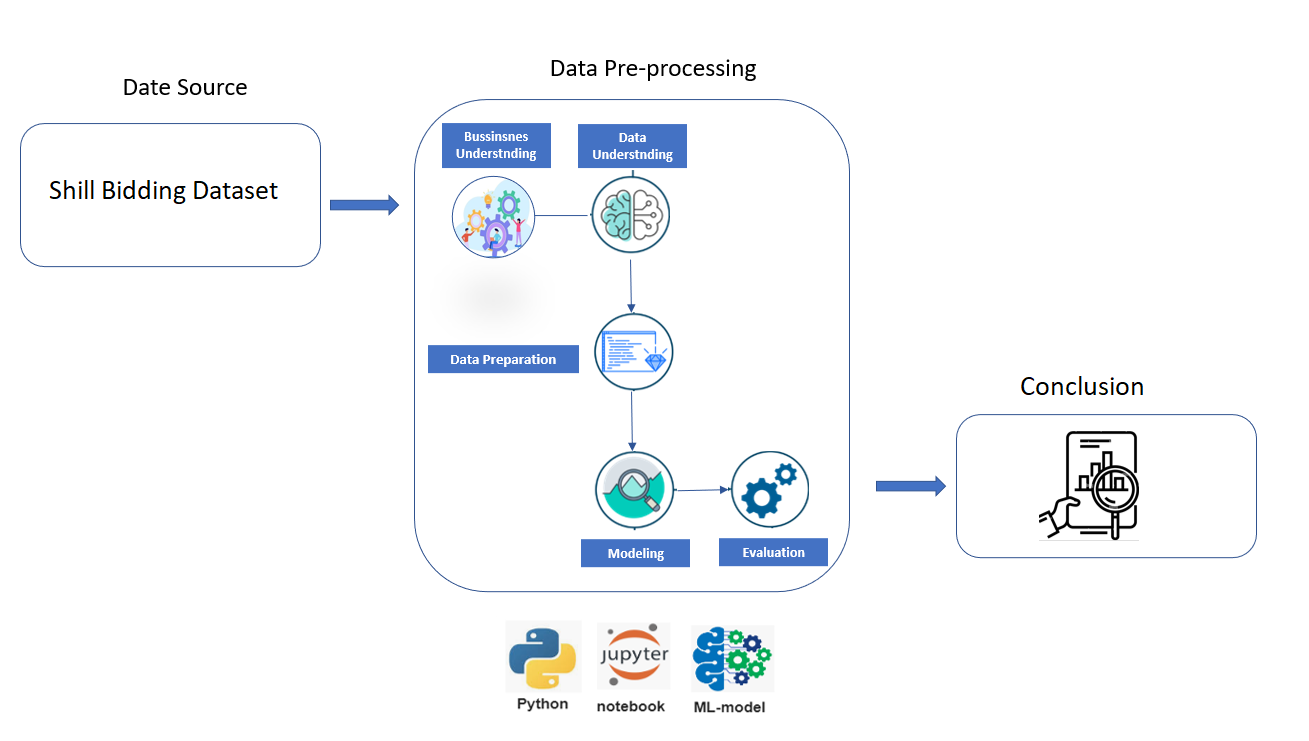

In [1]:
from IPython.display import Image
Image("CRISP_DM.png", width=800, height=800)

Import libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  

from sklearn.linear_model import LogisticRegression                     
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings('ignore')

# 2. Business Understanding

On this stage we have to carry out below two steps (Priya, 2019):
- Determine the business objective
- Identify the goal of the data analysis.

Following the assignment task, the business objective is to predict the bids using classification algorithms.

The goals of the data analysis could be:
- Get an accuracy of the target variable prediction ("Class") higher than 85%.
- Identify features, which are the most important for bidding class prediction.

# 3. Data Understanding

Data Understanding phase of CRISP-DM  focus on collecting the data, describing and exploring the data.

This stage comprises of four key steps to understand the available data, and identify new relevant data in order to solve the business problem (Priya, 2019):
- Collect relevant data
- Describe data for explicit information
- Explore data by plotting graphs
- Verify data quality to remove errors.

The first step is to upload the dataset. In addition, I want to set **"Record_ID"** as an index column. The reason for that is that the "Record_ID" column contains a unique identification number, which can facilitate data retrieval and handling data in general.

In order to avoid invalid values as **"na","?","NA","n/a", "--"**, they need to be converted to **NaN**. Values containing NaN are ignored from operations like mean, sum, etc. We can pass these formats in the `.read_csv(, na_values)` method to allow Pandas to recognize them as corrupt values. 

In [3]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
data = pd.read_csv("data/Shill Bidding Dataset.csv", na_values = missing_value_formats, index_col='Record_ID')

In [4]:
data.head(10)

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1


 After the data was uploaded, it can be checked for having any missing values and what type of the observations it has by using `.info` function.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6321 entries, 1 to 15144
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   int64  
 1   Bidder_ID               6321 non-null   object 
 2   Bidder_Tendency         6321 non-null   float64
 3   Bidding_Ratio           6321 non-null   float64
 4   Successive_Outbidding   6321 non-null   float64
 5   Last_Bidding            6321 non-null   float64
 6   Auction_Bids            6321 non-null   float64
 7   Starting_Price_Average  6321 non-null   float64
 8   Early_Bidding           6321 non-null   float64
 9   Winning_Ratio           6321 non-null   float64
 10  Auction_Duration        6321 non-null   int64  
 11  Class                   6321 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 642.0+ KB


It could be seen, that the dataset consists of numerical data with just one "object" column ("Bidder_ID"). Data size is 6321 rows and 12 columns and it doesn't have any missing values.

Next step is to get some statistical information using `.describe` and then recieve a visual understanding of the data and plot some graphs.

In [6]:
data.describe()

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


From the table above it can be observed, that values range is from 0 to 1 for each feature except just 2 feautures **"Auction_ID"** and **"Auction_Duration"**.

**"Last_Bidding"** and **"Auction_Duration"** seem to follow a normal distribution, because the mean close to  the median.

And the dependent variable **"Class"** is more represented by 0 than 1, because the mean equals 0.1. It means that the data is imbalanced. The "Class" column could be checked more in order to see the proportion between "0" and "1"  using `value_counts` function.

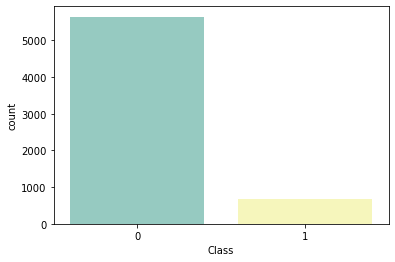

None
0    5646
1     675
Name: Class, dtype: int64


In [7]:
sns.countplot(data['Class'], palette="Set3")
print(plt.show())
print(data['Class'].value_counts())

Using the bachart above and the results of `value_counts` it could be confirmed that 0 class has 5646 entries, while 1 class has just 675 entries. Therefore, it means that we are dealing with a highly imbalanced dataset, which can be defined as one where at least one of the classes constitute only a very small minority (Amirneni and Honari, 2019). If it affects the accuracy of the modell, the data has to be balanced. 

The data has the only one object feature "Bidder_ID" (Unique identifier of a bidder). It can be checked if it has any unique values.

In [8]:
data.describe(include = object)

,Bidder_ID
count,6321
unique,1054
top,a***a
freq,112


In [9]:
data.Bidder_ID.value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

The "Bidder_ID" has 1054 unique values. It doesn't  have any usefull information as it's represented by encrypted unique names, therefore the column can be dropped in the next chapter "Data Prepration".

As we are dealing with a classification problem we don't need to identify correlation between variables.

Next step is to explore the data by using graphs. I want to plot boxplots and hystograms for each variable  in order to get a better understanding of distribution and outliers.

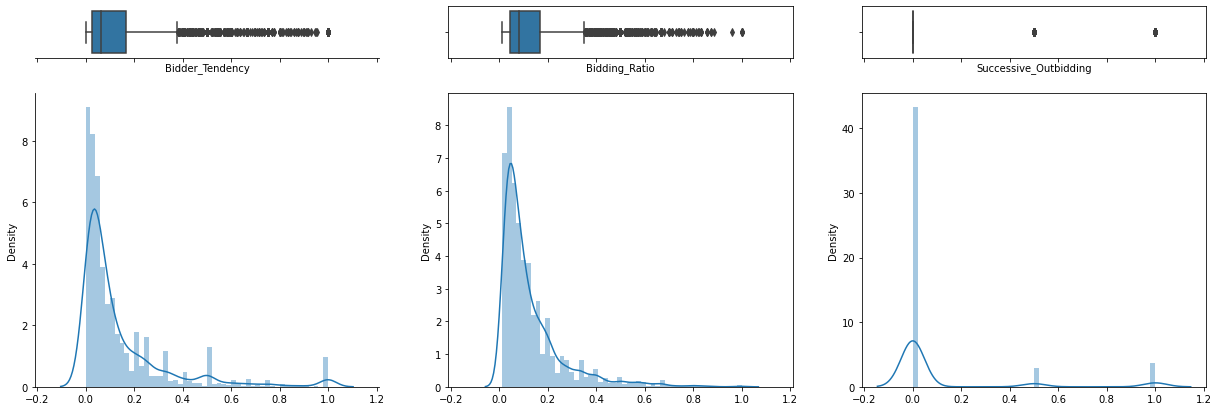

In [10]:
f, ((ax_box, ax_box_1, ax_box_2), (ax_hist, ax_hist_1, ax_hist_2)) = plt.subplots(2, 3, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (21,7) )

sns.boxplot(x = data["Bidder_Tendency"], ax=ax_box)
sns.distplot(x = data["Bidder_Tendency"], ax=ax_hist)

sns.boxplot(x = data["Bidding_Ratio"], ax=ax_box_1)
sns.distplot(x = data["Bidding_Ratio"], ax=ax_hist_1)

sns.boxplot(x = data["Successive_Outbidding"], ax=ax_box_2)
sns.distplot(x = data["Successive_Outbidding"], ax=ax_hist_2)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

It seems that **"Bidder_Tendency"** and **"Bidding_Ratio"** have many outliers and the distribution of both is positively skewed (Rowntree, 1982). **"Bidder_Tendency"** has a range between 0 and 1, it's a shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. It means that we can't remove any outliers. 

It's the same logic for **"Bidding_Ratio"**, so we have to hold all entries for this feature.

**"Successive_Outbidding"** is presented just by 3 values 0, 0.5 and 1.0. It means that the feauture doesn't have any outliers.  As number of 0 values are significantly higher than 0.5 and 1, it shows the values as outliers in the boxplot, what is not true.

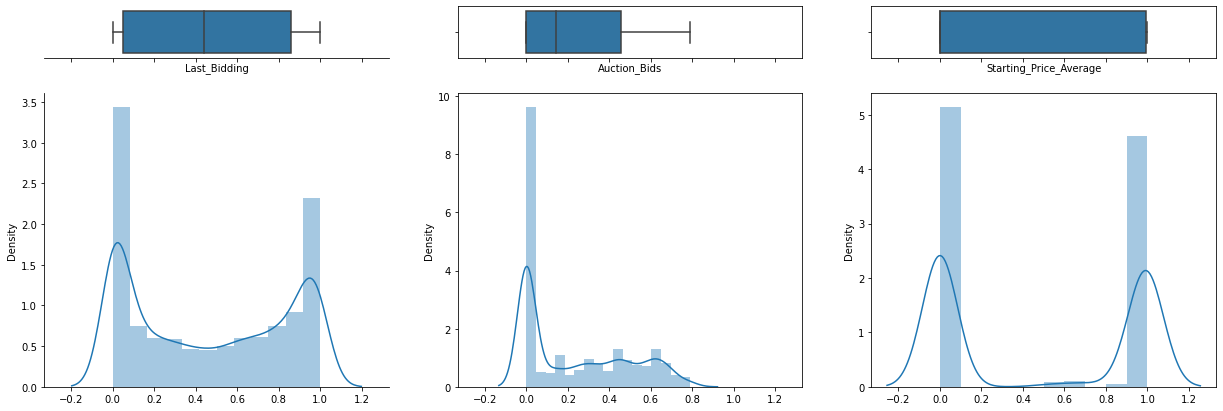

In [11]:
f, ((ax_box, ax_box_1, ax_box_2), (ax_hist, ax_hist_1, ax_hist_2)) = plt.subplots(2, 3, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (21,7) )

sns.boxplot(x = data["Last_Bidding"], ax=ax_box)
sns.distplot(x = data["Last_Bidding"], ax=ax_hist)

sns.boxplot(x = data["Auction_Bids"], ax=ax_box_1)
sns.distplot(x = data["Auction_Bids"], ax=ax_hist_1)

sns.boxplot(x = data["Starting_Price_Average"], ax=ax_box_2)
sns.distplot(x = data["Starting_Price_Average"], ax=ax_hist_2)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**"Last_Bidding"** is not following the normal distribution as I though before. We don't see any outliers and the most repetative values are 0 and 1.

**"Auction_Bids"** doesn't have any outliers as well, the most repetative value is 0. 

**"Starting_Price_Average"** is presented mostly by 0 and values close to 1. The feauture doesn't have any outliers. 

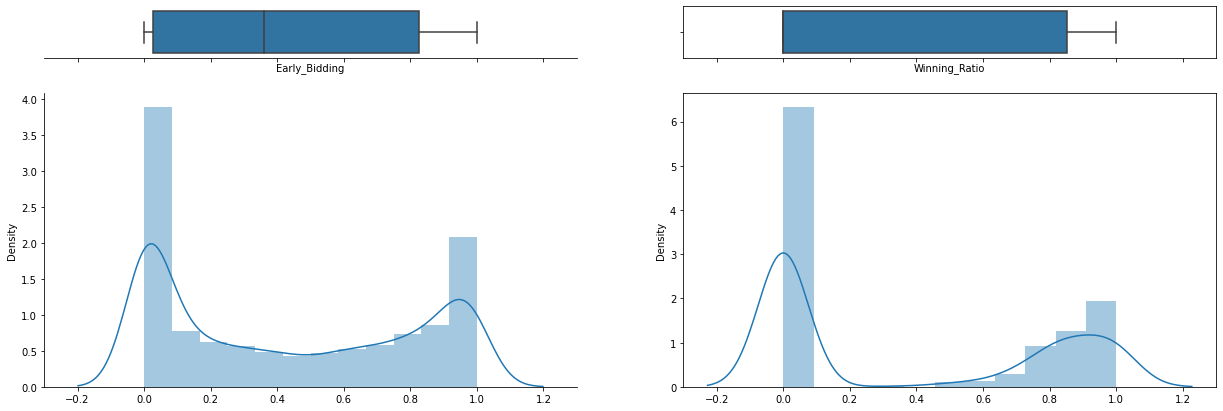

In [12]:
f, ((ax_box, ax_box_1), (ax_hist, ax_hist_1)) = plt.subplots(2, 2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (21,7) )

sns.boxplot(x = data["Early_Bidding"], ax=ax_box)
sns.distplot(x = data["Early_Bidding"], ax=ax_hist)

sns.boxplot(x = data["Winning_Ratio"], ax=ax_box_1)
sns.distplot(x = data["Winning_Ratio"], ax=ax_hist_1)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**"Early_bidding"** doesn't have any outliers, the most repetative value is 0 and 1.

**"Winning_Ratio"** is presented mostly by 0 and valuesmore between 0,5 and 1. The feauture doesn't have any outliers.

All 8 features above have the range beetween 0 and 1.

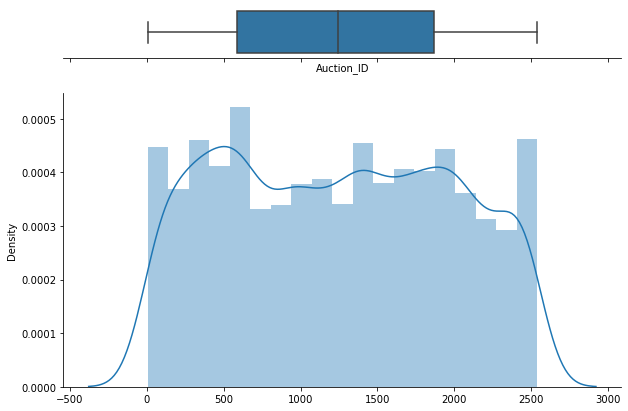

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,7) )

sns.boxplot(x = data["Auction_ID"], ax=ax_box)
sns.distplot(x = data["Auction_ID"], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**"Auction_ID"** is presented mostly by range from 5 to 2538 . It is the unique identifier of an auction

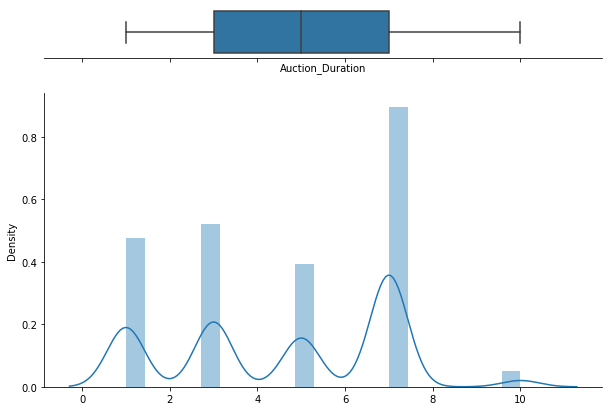

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,7) )

sns.boxplot(x = data["Auction_Duration"], ax=ax_box)
sns.distplot(x = data["Auction_Duration"], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [15]:
data["Auction_Duration"].value_counts()

7     2427
3     1408
1     1289
5     1060
10     137
Name: Auction_Duration, dtype: int64

**"Auction_Duration"** represents by 1, 3, 5, 7 and 10. The most repetative value is 7. The feature doesn't have any outliers.

All outliers from the boxplots above were hold and commented.

# 4. Data Preparation

Data preparation tasks are likely to be performed multiple times and not in any prescribed order. Tasks include table, record and attribute selection as well as transformation and cleaning of data for modeling tools.
It consists of the following steps (Priya, 2019):

- Select relevant data
- Integrate Data
- Clean data
- Construct Data: Derive new features
- Format Data

I want to start this stage with dropping feautures. In the previous chapter "Bidder_ID" was observed as an object type of value which doesn't have any usefull information. Therefore it can be dropped.

In [16]:
data = data.drop(columns='Bidder_ID')

## Normalization

As it was mentioned before, the data has features with range between 0 and 1 except **"Auction_ID"** (5 to 2538) and **"Auction_Duration"** (1 to 10). Therefore, the dataset has to be normalized. Normalization is basically defined as the process of bringing the features or explanatory variables to a similar scale. Normalization is very important in terms of stability or accuracy of the learning model. Having features on the same scale also helps us get rid of the curse of dimensionality (khandelwal, 2021).

Because that most of the features are already ranged between 0 and 1, I will use MinMax Scaling. This normalization technique involves scaling the dataset to a range of [0, 1] by subtracting the feature columns with the minimum value of the particular column and dividing it by the difference of the minimum and maximum values of the same column (khandelwal, 2021).

Before applying `MinMazScaler` the data needs to be separated in class label (dependent variable **y**) and attributes (independent variables **X**).

In [17]:
X = data.drop(columns = 'Class')
y = data['Class']

In [18]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [19]:
X_scaled

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
Record_ID,,,,,,,,,,
1,0.287011,0.200000,0.392857,0.0,0.000028,0.000000,0.993657,0.000028,0.666667,0.444444
2,0.287011,0.024390,0.190476,0.0,0.013124,0.000000,0.993657,0.013124,0.944444,0.444444
3,0.287011,0.142857,0.190476,0.0,0.003042,0.000000,0.993657,0.003042,1.000000,0.444444
4,0.287011,0.100000,0.190476,0.0,0.097487,0.000000,0.993657,0.097487,1.000000,0.444444
5,0.353336,0.051282,0.212963,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667
...,...,...,...,...,...,...,...,...,...,...
15129,0.298066,0.333333,0.150000,1.0,0.738631,0.355224,0.993657,0.686426,0.888889,0.222222
15137,0.977497,0.030612,0.120083,0.0,0.005755,0.275795,0.993657,0.000010,0.878788,0.666667
15138,0.977497,0.055556,0.032091,0.0,0.015665,0.275795,0.993657,0.015665,0.000000,0.666667


## Feature importance

Before applying Dimensionality reduction, I want to get information about features importances in order to answer the second goal of the business understanding part "Identify features, which are the most important for bidding class prediction".

I'm going to use the `DecisionTreeClassifier` which ranges features by their importance. Feature importances attempt to show the relevance of each feature to the task of predicting the target. It is a number between 0 and 1 for each feature, where 0 means "not used at all" and 1 means "perfectly predicts the target". The feature importances always sum to 1 (Müller and Guido, 2017).

Calculating feauture impotance (Koehrsen, 2018).

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_scaled, y)

DecisionTreeClassifier()

In [21]:
importances = dt.feature_importances_
X_futures = data.drop(['Class'], axis = 1)
feature_list = list(X_futures.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values(by='importance', ascending=False, ignore_index=True)
feature_results

,feature,importance
0,Successive_Outbidding,0.800406
1,Auction_Duration,0.108398
2,Winning_Ratio,0.064638
3,Last_Bidding,0.010777
4,Bidder_Tendency,0.008448
5,Auction_Bids,0.002771
6,Bidding_Ratio,0.002695
7,Early_Bidding,0.001106
8,Auction_ID,0.000761
9,Starting_Price_Average,0.000000


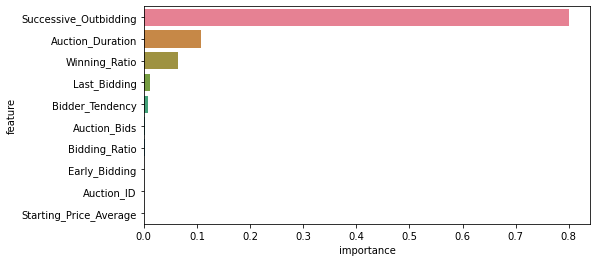

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_results["importance"], y=feature_results["feature"], orient='h', palette='husl')
plt.show()

It could be seen that four the most important features for predicting the target variable are:

- Successive_Outbidding (80.04%)
- Auction_Duration (10.84%)
- Winning_Ratio (6.46%)
- Last_Bidding (1.19%).

All other 6 feautures (Bidder_Tendency, Auction_Bids, Early_Bidding, Auction_ID, Bidding_Ratio, Starting_Price_Average) has importance less than 1%.

## Dimensionality Reduction

Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. I'm going to apply and compare two dimensionality reduction methods:

- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA).



### PCA

PCA is an unsupervised machine learning method that is used for dimensionality reduction. The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent (Kapri, 2020).

I've already separated independants variables and the target variable, therefore PCA can be applied straight away.

At the beggining I want to count number of components which I need for keeping 95% of original data. 

In [23]:
pca = PCA(0.95).fit(X_scaled)
n_pc = pca.n_components_
n_pc

7

Number of components equal to 7 can hold 95% of original data. Next I want to plot Explained varaince ratio graph to see dependence between number of components and explained variance ratio.

Text(0, 0.5, 'Сumulative explained variance')

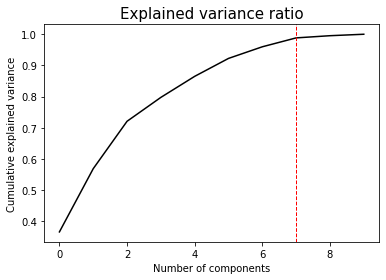

In [24]:
pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='black', linewidth=1.5)

plt.axvline(x=n_pc, color='r', linestyle='dashed', linewidth=1)

plt.title('Explained variance ratio', fontsize = 15)
plt.xlabel('Number of components') 
plt.ylabel('Сumulative explained variance')

I'm going to transform X_scaled isung PCA function with 7 conponents.

In [25]:
pca = PCA(n_pc)
X_pca = pca.fit_transform(X_scaled)

The new shape of X_pca after dimensionality reduction.

In [26]:
X_pca.shape

(6321, 7)

Next I want to create a DataFrame with 7 components and the target variable (data_pca).

In [27]:
data_pca = pd.DataFrame(X_pca, columns =["PC" + str(i + 1) for i in range(n_pc)], index = data.index)
data_pca["Class"] = data["Class"]
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Class
Record_ID,,,,,,,,
1,-0.298056,-0.286685,0.704717,-0.253112,-0.023469,-0.346852,0.250033,0
2,-0.363639,-0.147604,0.789179,-0.266970,-0.046984,-0.512142,0.139304,0
3,-0.390393,-0.112087,0.841871,-0.260818,-0.044962,-0.500757,0.117379,0
4,-0.310046,-0.026224,0.778908,-0.271366,-0.045438,-0.516775,0.121515,0
5,-0.830535,-0.228246,-0.034345,-0.023946,0.277001,-0.115278,0.031490,0


I want to check the variance of each component using `pca.explained_variance_ratio_`.

In [28]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36626971, 0.20274639, 0.15195376, 0.07665011, 0.06742636,
       0.05748023, 0.03727399])

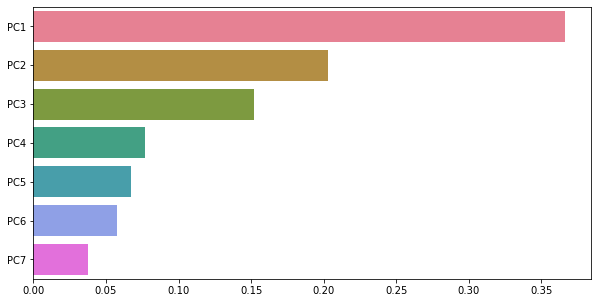

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(pca.n_components_)], orient='h', palette='husl')
plt.show()

In [30]:
pca.explained_variance_ratio_.sum()

0.9598005615001813

From the barchart above it could be mentioned, that first three components contain the most ammount of data (around 72.1%), the last component holds just 3.7% of original data. The summary explained variance is equal 95.98%.

### LDA

LDA is a supervised machine learning method that is used to separate groups/classes. The main idea of LDA is to maximize the separability between the groups so that we can make the best decision to classify them (Kapri, 2020).

Because the number of classes in the target is 2 (0 and 1), the number of components in LDA will be just 1.

In [31]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled,y)

In [32]:
data_lda = pd.DataFrame(data = X_lda, columns = ['LDA'], index = data.index)
data_lda["Class"] = data["Class"]
data_lda

,LDA,Class
Record_ID,,
1,-0.711686,0
2,-0.642538,0
3,-0.613343,0
4,-0.609557,0
5,-0.817086,0
...,...,...
15129,7.428993,1
15137,-0.663630,0
15138,-0.979930,0


From the table above it could be mentioned, that negative values in LDA 1 belong to "0" class and positive numbers belong to "1" class.

PCA dimensionality reduction method allows us to choose the number of components we need to use based in the highest variance. Apart from PCA in LDA we can't control the number of components, it's always reduced by one from number of classes we have represented as a target variable. However, LDA is a better to use for solving classification problems as it creates a clear separation between classes.

It was the last step of this stage, the dataset is ready for applying ML models. For the purpose of the modeling stage I'm going to use two datasets with applied LDA, because I'm going to apply classification models.

# 5. Modeling

At this stage we will select the actual modelling technique that is to be used.

I'm going to use Supervised machine learning approach for the data. The main distinction between Supervised and Unsupervised approaches is using of labeled datasets. To put it simply, supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not. In our case the data has already "class" label, which we are going to predict.

I'm going to split the dataset (data_lda) on the train and test parts, keeping the train part equals to 70% and the test part to  30%. We split the data in order to train the model only on the train set and check how it works and get the accuracy on the test set.

## Logistic Regression

I choose Logistic Regression algorythm for "Class" prediction. Logistic Regression is a Supervised Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable (Li, 2017). The reason why I'll be using the Logistic regression algorithm is because it's designed for two-class (binary) problems, modeling the target using a binomial probability distribution function.

### Applying for Scaled Data

Firstly, I want to check the results of Logistic Regression model for Scaled data (X_scaled), in order to see the accuracy of modelling without any dimentionality reduction.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1, shuffle=True)

In [34]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train, y_train)
y_pred_scaled = lr_scaled.predict(X_test)

In [35]:
print('Training score: {:.3f}'.format(lr_scaled.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(lr_scaled.score(X_test,y_test)))

Training score: 0.977
Testing score: 0.976


In [36]:
confusion_matrix(y_test, y_pred_scaled)

array([[1678,   28],
       [  18,  173]], dtype=int64)

The accuracy of the model is already really high (0.976) without optimization any hyperparameters and dimentionality reduction

- True Negative: Out of 1706 actual negative cases, in 1678 cases the model predicted negative.
- True Positive: Out of 191 positive cases, the model predicted 173 positive case correctly.

### Applying for LDA 

In [37]:
X_lda = data_lda.drop(columns='Class')
y = data_lda['Class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=1, shuffle=True)

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [40]:
print('Training score: {:.3f}'.format(lr.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(lr.score(X_test,y_test)))

Training score: 0.981
Testing score: 0.978


In [41]:
confusion_matrix(y_test, y_pred)

array([[1667,   39],
       [   3,  188]], dtype=int64)

The accuracy of the model is already really high (0.978) without optimization any hyperparameters.

- True Negative: Out of 1706 actual negative cases, in 1667 cases the model predicted negative.
- True Positive: Out of 191 positive cases, the model predicted 188 positive case correctly.


### Applying for PCA

I want to check the accuracy of the model for data with PCA dimensionality reduction and compare it with LDA applied data.

In [42]:
X_pca = data_pca.drop(columns='Class')

In [43]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1, shuffle=True)

In [44]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

In [45]:
print('Training score PCA: {:.3f}'.format(lr_pca.score(X_train_pca,y_train)))
print('Testing score PCA: {:.3f}'.format(lr_pca.score(X_test_pca,y_test)))

Training score PCA: 0.974
Testing score PCA: 0.976


In [46]:
confusion_matrix(y_test, y_pred_pca)

array([[1687,   19],
       [  27,  164]], dtype=int64)

- True Negative: Out of 1706 actual negative cases, in 1687 cases the model predicted negative.
- True Positive: Out of 191 positive cases, the model predicted 164 positive case correctly.

The accuracy of the Logistic Regression model for the PCA applied data is significantly high as well. Testing score of LDA applied data is a bit higher 0.978 compared with 0.976. In the next chapters I will explore the data with just LDA dimensionality reduction.

### SMOTE

As it was mentioned in the data uderstanding chapter the data is imbalaced ("0" - 5646, "1" - 675). I want to apply SMOTE method in order to balance the data and check the accuracy of the model, even it's already high.

SMOTE is an oversampling method which creates “synthetic” example rather than oversampling by replacements. The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen.

We can apply this method using library `imblearn.over_sampling` and `SMOTE` function.

In [47]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_sample(X_train, y_train)

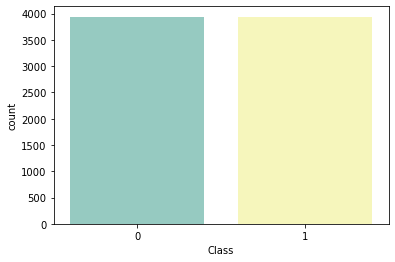

None
0    3940
1    3940
Name: Class, dtype: int64


In [48]:
sns.countplot(y_train_sm, palette="Set3")
print(plt.show())
print(y_train_sm.value_counts())

It could be seen that the "Class" label has the equal amount 3940 of "0" and "1" values.

Let's apply the Logistic regrission model in oder to check the accuracy after balance the data using SMOTE technique.

In [49]:
lr_sm = LogisticRegression()
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = lr_sm.predict(X_test)

In [50]:
print('Training score using SMOTE: {:.3f}'.format(lr_sm.score(X_train_sm,y_train_sm)))
print('Testing score using SMOTE: {:.3f}'.format(lr_sm.score(X_test,y_test)))

Training score using SMOTE: 0.985
Testing score using SMOTE: 0.969


In [51]:
confusion_matrix(y_test, y_pred_sm)

array([[1649,   57],
       [   1,  190]], dtype=int64)

- True Negative: Out of 1706 actual negative cases, in 1649 cases the model predicted negative.
- True Positive: Out of 201 positive cases, the model predicted 190 positive case correctly.

As I was expected that SMOTE reduced the accuracy of the model (0.969 compared with 0.978). I will be using SMOTE method for the next modeling.

### Hyperparameters

With the next step I want to define the best model's parameters for Logistic Regression in order to get higher possible accuracy. I'll be working with the next LogisticRegression parameters:
- solvers
- penalty
- c_values.

**Solvers** - algorithm using in the optimization problem:

- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
- ‘liblinear’ is limited to one-versus-rest schemes.

**Penalty** - specify the norm of the penalty:

- 'none': no penalty is added
- 'l2': add a L2 penalty term and it is the default choice
- 'l1': add a L1 penalty term


**C_values** - inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization (Scikit-learn.org, 2014).

We need to records parameters we've defined in a list:

In [52]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values (Brownlee, 2020).

In [53]:
grid = dict(solver=solvers,penalty = penalty, C=c_values)
grid_search = GridSearchCV(estimator=lr_sm, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_sm, y_train_sm)

In [54]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.985279 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


We've defined that the best accuracy will'be reached by using C=0.01, penalty = 'l1' and a solver = 'liblinear'. Now, let's train the model with these parameters:

In [71]:
lr_grid = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
lr_grid.fit(X_train_sm, y_train_sm)
y_pred_grid = lr_grid.predict(X_test)

Let's see what accuracy we get on training and testins set to make sure the model is not underfitted or overfitted.

In [72]:
print('Training score: {:.3f}'.format(lr_grid.score(X_train_sm,y_train_sm)))
print('Testing score: {:.3f}'.format(lr_grid.score(X_test,y_test)))

Training score: 0.985
Testing score: 0.969


Wee see that both training and testing scores are closeto each other and the model perfoms well on both sets. It's surprised that the accuracy of the model with hyperparameters tuning is the same than without them (0.969 = 0.969). The last step is to run the classification report and identify Type I and Type II errors.

In [73]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/1400/1*1rB5CecD6UPllcQhtdIx6Q.png", width=500, height=500)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1706
           1       0.77      0.99      0.87       191

    accuracy                           0.97      1897
   macro avg       0.88      0.98      0.93      1897
weighted avg       0.98      0.97      0.97      1897

AxesSubplot(0.125,0.125;0.775x0.755)


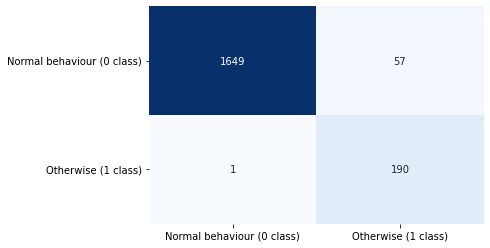

In [74]:
print(classification_report(y_test, y_pred_grid))
print(sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

- True Negative: Out of 1706 actual negative cases, in 1649 cases the model predicted negative.
- True Positive: Out of 201 positive cases, the model predicted 190 positive case correctly.

We can obserse that the model perfomed very well. Over 1901 "0" class values 57 were predicted as False Positive and over 191  "1" class values only 1 was predicted as False Negative, which is a very good result.

## Decision Tree

A decision tree is an algorithm for supervised learning. It uses a tree structure, in which there are two types of nodes: decision node and leaf node. A decision node splits the data into two branches by asking a boolean question on a feature. A leaf node represents a class. The training process is about finding the “best” split at a certain feature with a certain value. And the predicting process is to reach the leaf node from root by answering the question at each decision node along the path (M, 2020).

In [75]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_sm, y_train_sm)
y_pred_dt = dt.predict(X_test)

In [76]:
print('Training score: {:.3f}'.format(dt.score(X_train_sm,y_train_sm)))
print('Testing score: {:.3f}'.format(dt.score(X_test,y_test)))

Training score: 1.000
Testing score: 0.978


In [77]:
confusion_matrix(y_test, y_pred_dt)

array([[1671,   35],
       [   7,  184]], dtype=int64)

- True Negative: Out of 1706 actual negative cases, in 1670 cases the model predicted negative.
- True Positive: Out of 201 positive cases, the model predicted 182 positive case correctly.

It turns out that the training accuracy is 100%, it means that the model is overfitting the training data. Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data. The model is not of any use in the real world as it is not able to predict outcomes for new cases. In order to avoid overfitting, we need to introduce two hyperparameters for training. They are:
- maximum depth of the tree
- minimum size of a leaf.

**Max_depth** - the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**Min_samples_leaf** - the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches (Scikit-learn.org, 2014).

For both hyperparameters defined I'll create a range between 1 to 15. The estimator will check each value of both in order to define the best ones.

In [78]:
depth = range(1, 15)
leaf = range(1, 15)

In [79]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=dt, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_sm, y_train_sm)

In [80]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.988706 using {'max_depth': 3, 'min_samples_leaf': 1}


We see that the estimator has defined max_depth = 3 and min_samples_leaf = 1. Let's train the model by using defined parameters.

In [87]:
dt_grid = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=1)
dt_grid.fit(X_train_sm, y_train_sm)
y_pred_dt_grid = dt_grid.predict(X_test)

In [88]:
print('Training score: {:.3f}'.format(dt_grid.score(X_train_sm,y_train_sm)))
print('Testing score: {:.3f}'.format(dt_grid.score(X_test,y_test)))

Training score: 0.990
Testing score: 0.977


The training set score less than 1.00, therefore the problem of overfitting was solved.
Let's create the confusion matrix and classification report.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1706
           1       0.82      0.99      0.90       191

    accuracy                           0.98      1897
   macro avg       0.91      0.98      0.94      1897
weighted avg       0.98      0.98      0.98      1897

AxesSubplot(0.125,0.125;0.775x0.755)


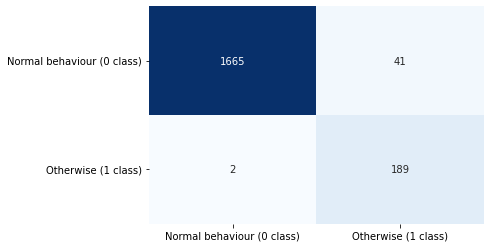

In [89]:
print(classification_report(y_test, y_pred_dt_grid))
print(sns.heatmap(confusion_matrix(y_test, y_pred_dt_grid), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

- True Negative: Out of 1706 actual negative cases, in 1666 cases the model predicted negative.
- True Positive: Out of 201 positive cases, the model predicted 189 positive case correctly.

We infer that with this model over 1901 "0" class values 40 were predicted as False Positive and over 191 "1" class values 2 were predicted as False Negative.

Next step is to evaluate Logistic Regression and Decision Tree Classifier moodels by using cross-validation technique.

## Cross-validation

In machine learning, Cross-validation is a technique that evaluates any ML model by training several ML models on subsets of the input data and evaluating them on the complementary subset of the data. It is mainly used to estimate any quantitative measure of fit that is appropriate for both data and model. In the cross-validation approach, the test results are usually not biased because the data used for training and testing are mostly non-overlapping. (Abhigyan, 2021).

I'm going to apply Stratified K-Fold cross-validation method from the `sklearn.model_selection library`, because it's suitable for imbalanced data. 

In [84]:
Image(url="https://miro.medium.com/max/1400/1*D9r0Xi2JotlOpO0Ozz5euw.png", width=600, height=600)


Let's create a list with the models and mentioned the hyperparameters which were found in the previous chapters.

In [85]:
models = []
models.append(("Logistic Regression", LogisticRegression(C=0.01, penalty='l1', solver='liblinear')))
models.append(("Decision Tree", DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)))
models

[('Logistic Regression',
  LogisticRegression(C=0.01, penalty='l1', solver='liblinear')),
 ('Decision Tree',
  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1))]

I'm going to use n_splits equal to 2 as the number of our labels (0 and 1).

In [86]:
results= dict()
for name, model in models:
    kfold=StratifiedKFold(n_splits=2, random_state=1, shuffle = True)
    cv_results=cross_val_score(model, X_lda, y, cv=kfold, scoring="accuracy")
    results[name]=(cv_results.mean(),cv_results.std())
print()
print("name", "result.mean", "result.std")
for key, value in results.items():
    print(key,value)


name result.mean result.std
Logistic Regression (0.9764282053027603, 0.002685718747872601)
Decision Tree (0.9789593002534849, 0.0017369022781606458)


The accuracy of using cross-validation method is still high and close to each other for both models (0.9764 and 0.9790). Therefore, it means that our models work well for new data.

# 6. Evaluation

This phase evaluates the model concerning the business indicator and what to do next. On the business understanding stage we've defined two main question we would like to get answers with the project:

- Get an accuracy of the target variable prediction ("Class") higher than 85%.
- Identify features, which are the most important for bidding class prediction.

It was found out that the target variable can be predicted with an accuracy higher than 85% with using LDA dimentionaly reduction and applying the LogisticRegression and the DecisionTreeClassifier models.

We detected four the most important features for predicting the target variable are:

- Successive_Outbidding
- Auction_Duration
- Winning_Ratio
- Last_Bidding.

The table above shows the modeling results of Logistig Regression for Scaled data, LDA and PCA dimensionality reduction methods for the imbalanced data.

|Characterisctics              |Logistic Regression Scaled    |Logistic Regression LDA    |Logistic Regression PCA|
|------------------------------|-----------------------|-----------------------|-----------------------|
|Training accuracy             |                  0.977|                  0.981|                  0.974|
|Testing accuracy              |                  0.976|                  0.978|                  0.976|
|Number of used hyperparameters|                      0|                      0|                      0|
|Type I error                  |                     28|                     39|                     19|
|Type II error                 |                      18|                       3|                     27|

From the table above it could be mentioned that the results are almost similar for original scaled data and the both techniques of dimensionality reduction, it means that the data is basically was clean and good suitable for modeling. 

The table above represents the modeling results of Logistic Regression and Decision Tree models using LDA dimentionality reduction with and without hyperparameters (HP) for the balanced data (using SMOTE technique).

|Characterisctics              |Logistic Regression    |Logistic Regression + HP|  Decision Tree      |  Decision Tree + HP  |
|------------------------------|-----------------------|-----------------------|----------------------|----------------------|
|Training accuracy             |                  0.985|                  0.986|                 1.000|                 0.990|
|Testing accuracy              |                  0.970|                  0.970|                 0.976|                 0.977|
|Number of used hyperparameters|                      0|                      3|                     0|                     2|
|Type I error                  |                     66|                     66|                    37|                    41|
|Type II error                 |                      1|                      1|                    9|                     2|

In conclusion, both of Logistic Regression models and Decicion Tree with hypoparameters work very well. It was mentioned that hyperparameters {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}, which were founf by GridSearchCV, don't affect the model and the accuracy hasn't change. The problem of overfitting in Decision Tree Classifier was solved by using hypoparameters {'max_depth': 3, 'min_samples_leaf': 1}. The best accuracy results have the Decision Tree Classifier with hyperparameters, it is for test set equal to 0.977 and over 1901 "0" class values 40 were predicted as False Positive, over 191 "1" class values 2 were predicted as False Negative.

# 7. Conclution

First of all, the data were prepared for modeling. Logistic Regression and Decision Tree Classifier had perfomed really well and satisfied the accuracy requirements. Hyperparameters were choosen and optimized by GridSearchCV. Two dimensionality reduction techniques (PCA and LDA) were implemented, the results were compared. Also SMOTE method was used to balance the data. The models were checked using  Stratified K-Fold cross-validation method and the results are high. Business goals, which were defined on the business understanding stage, were achived. The most important features, which can be used in the future for data mining, were defined as well. 

# Reference List

Abhigyan (2021). Cross-Validation Techniques. [online] Geek Culture. Available at: https://medium.com/geekculture/cross-validation-techniques-33d389897878.

Amirneni, S. and Honari, B. (2019). Anomaly Detection in Highly Imbalanced Dataset. [online] Available at: https://www.scss.tcd.ie/publications/theses/diss/2019/TCD-SCSS-DISSERTATION-2019-029.pdf.

Brownlee, J. (2020). Hyperparameter Optimization With Random Search and Grid Search. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/.

Kapri, A. (2020). PCA vs LDA vs T-SNE — Let’s Understand the difference between them! [online] Medium. Available at: https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0.

khandelwal, S. (2021). Normalization, its types and Normalization layers. [online] MUACM. Available at: https://medium.com/muacm/normalization-its-types-and-normalization-layers-c9f1bb40b2dd [Accessed 15 May 2022].

Koehrsen, W. (2018). A Complete Machine Learning Walk-Through in Python: Part Three. [online] Medium. Available at: https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-three-388834e8804b [Accessed 15 May 2022].

Luna, Z. (2021a). CRISP-DM Phase 1: Business Understanding. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/crisp-dm-phase-1-business-understanding-255b47adf90a.


M, J. (2020). Construct a Decision Tree and How to Deal with Overfitting. [online] Medium. Available at: https://towardsdatascience.com/construct-a-decision-tree-and-how-to-deal-with-overfitting-f907efc1492d.


Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.

Priya, L. (2019). A Beginner’s Guide to Industry Standard Process of Data Mining: CRISP-DM. [online] Medium. Available at: https://medium.com/analytics-vidhya/a-beginners-guide-to-industry-standard-process-of-data-mining-crisp-dm-c1d7d50e57c3.


Rowntree, D. (1982). Statistics without tears : a primer for non-mathematicians. New York: Scribner.

Scikit-learn.org. (2014). sklearn.linear_model.LogisticRegression — scikit-learn 0.21.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

Wijaya, C.Y. (2021). CRISP-DM Methodology For Your First Data Science Project. [online] Medium. Available at: https://towardsdatascience.com/crisp-dm-methodology-for-your-first-data-science-project-769f35e0346c.